# Q1 a

In [50]:
%load_ext autoreload
%autoreload 2

# adding relavent directory in includes
import sys
dirr = "../../src"
if dirr not in sys.path:
    sys.path.append(dirr)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from knn import KNNClassifier
from utils import train_timer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
data = pd.read_csv("../../data/iris/iris.csv")
data.head(5)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [52]:
knns = KNNClassifier()
knns.train(data.iloc[:, :-1].values, data.iloc[:, -1].values)
y_pred = knns.predict(data.iloc[:, :-1].values)
corr = np.sum(y_pred == data.iloc[:, -1].values)
print ('acc:' corr / len(y_pred))

0.9798657718120806

# Q1 b

In [95]:
samples = [2 ** i for i in range(2, 15)]
features = [2 ** i for i in range(2, 15)]
k = 3
dist_metric = 'euclidian'

train_vals = []
test_vals = []

for i, sample in enumerate(samples):
    for j, feature in enumerate(features):
        y = np.zeros(sample)
        x = np.random.rand(sample, feature)
        model = KNNClassifier(k = 2, dist_metric='euclidian')
        train_vals.append((i, j, train_timer(model.train, X=x, y=y)))
        
        x_test = np.random.rand(2, feature)
        test_vals.append((i, j, train_timer(model.predict, X_test=x_test)))

# print (train_vals)
# print (test_vals)

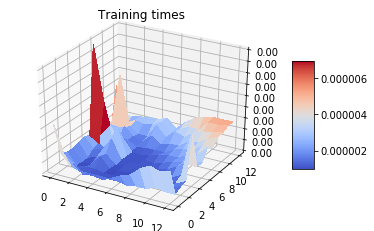

In [96]:
# ~~~~ MODIFICATION TO EXAMPLE BEGINS HERE ~~~~ # 
# Taken from https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib
import pandas as pd
from scipy.interpolate import griddata
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# create 1D-arrays from the 2D-arrays
x, y, z = zip(*train_vals)
xyz = {'x': x, 'y': y, 'z': z}

# put the data into a pandas DataFrame (this is what my data looks like)
df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

# re-create the 2D-arrays
x1 = np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
y1 = np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
# ax.set_zlim(-1, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Training times')
# ~~~~ MODIFICATION TO EXAMPLE ENDS HERE ~~~~ #

plt.show()

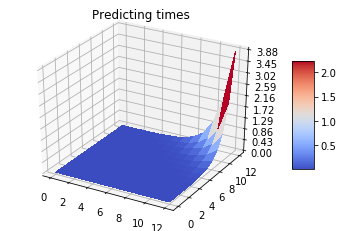

In [97]:
# ~~~~ MODIFICATION TO EXAMPLE BEGINS HERE ~~~~ # 
# Taken from https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib
import pandas as pd
from scipy.interpolate import griddata
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# create 1D-arrays from the 2D-arrays
x, y, z = zip(*test_vals)
xyz = {'x': x, 'y': y, 'z': z}

# put the data into a pandas DataFrame (this is what my data looks like)
df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

# re-create the 2D-arrays
x1 = np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
y1 = np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
# ax.set_zlim(-1, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Predicting times')
# ~~~~ MODIFICATION TO EXAMPLE ENDS HERE ~~~~ #

plt.show()

The theoretical running time complexity for:

- Training: $O(const)$

- Predicting: $O(n \times m)$

Where $n$ is the number of samples, and $m$ is the number of features.

The resulting plots obtained above seem by the theoretical complexities. Although we see training time seems to increase, this is because the time taken to save n is not constant, due to implementation details. Also we notice that we get spikes due to other factors like background processes affecting the timings here

# Q2